In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import gaussian_kde
sns.set()

In [2]:
'''
This cell downloads data, and normalizes multiple factors that affect sensitivty into 1 value
'''
def normalize(x):
    return x.DPI * x.Multiplier * x.Vertical * x.ADS

df = pd.read_html('http://www.r6prosettings.net/')[0]
df = df.iloc[:,5:]
df.iloc[:, :-1] = df.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')
mean = df.iloc[:,:-1].mean(0)
df.iloc[:, :-1] = df.iloc[:,:-1].fillna(mean) # fill empty columns with means

df['NormalizedSens'] = df.apply(normalize, 1)

df = df[(df.NormalizedSens.round() != round(normalize(mean))) & (df.NormalizedSens)] # removing 0 values and rows consisting of all empty columns (all means)

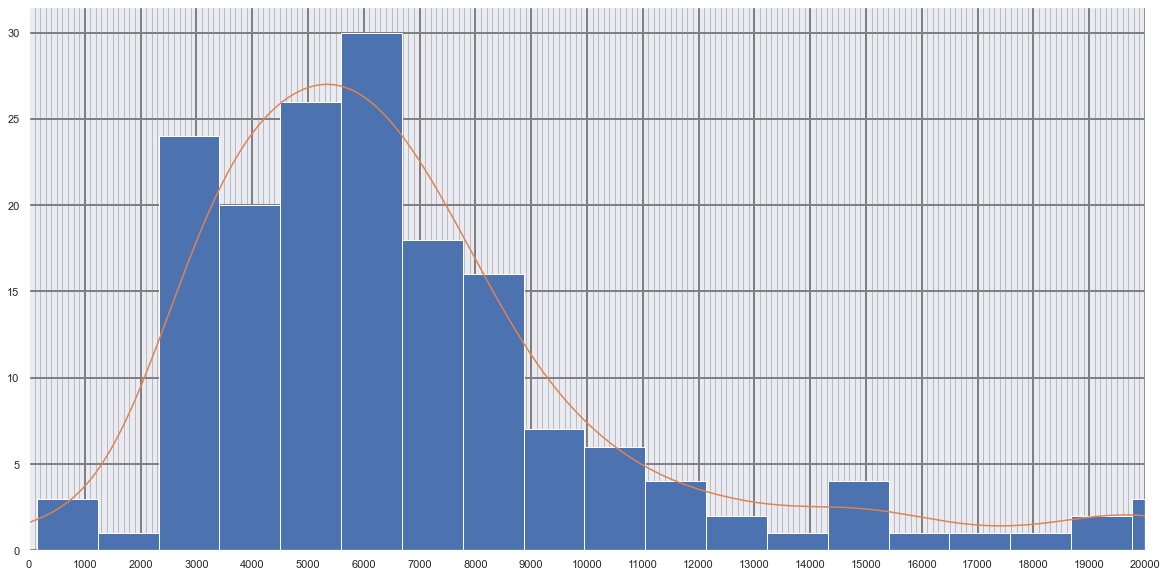

In [3]:
'''
This cell shows normalized sensitivities 
'''
fig, ax = plt.subplots(1, 1, figsize=(20,10))
xlim = plt.xlim((0, 20000))
hist = plt.hist(df.NormalizedSens, 80)

#KDE (smooth line that stays around the edges of the histogram)
kde = gaussian_kde(df.NormalizedSens)
kde.covariance_factor = lambda : 0.1
kde._compute_covariance()
kdeline = kde(np.linspace(*xlim, int(xlim[1] - xlim[0])))
plt.plot(kdeline * hist[0].max() / kdeline.max() * 0.9)

#LOOKS
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
plt.grid(1, 'major', linewidth=2, color='gray')
plt.grid(1, 'minor', linewidth=1, color='#bbbbbb')


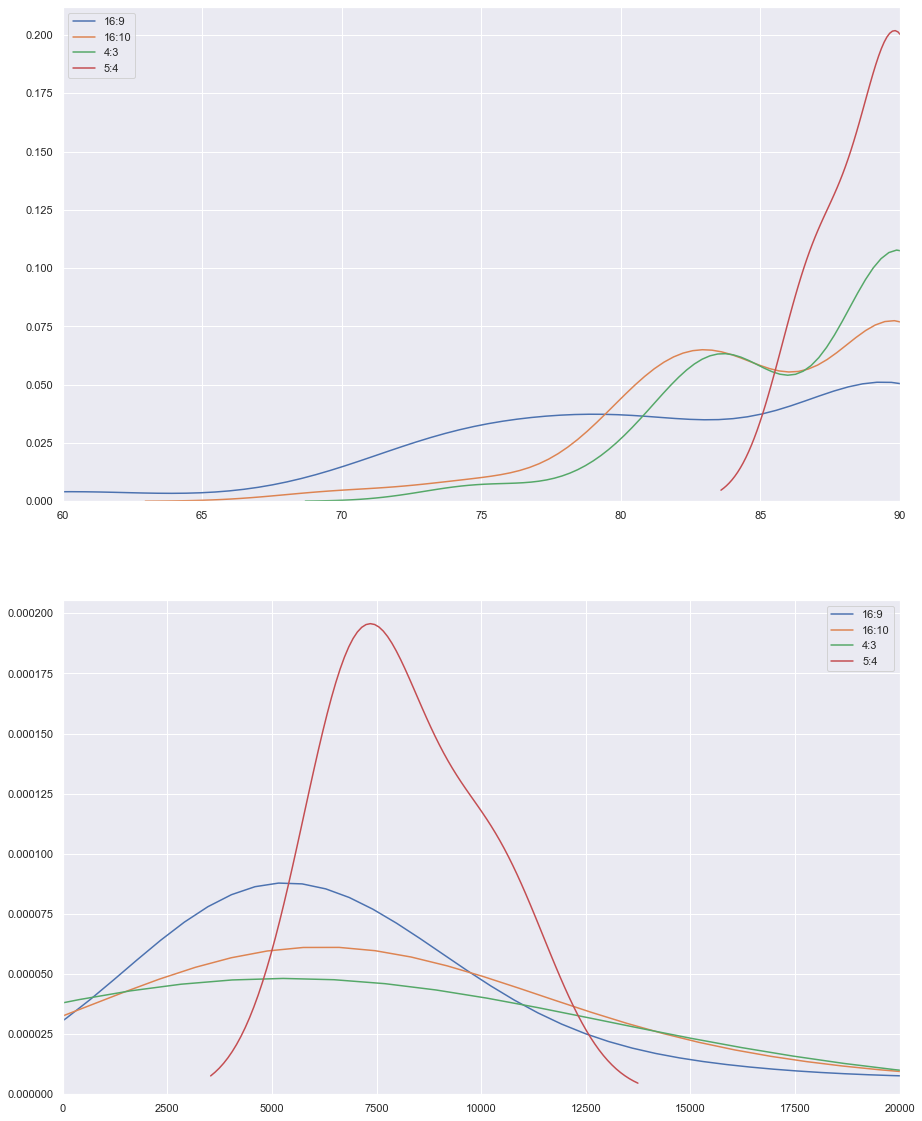

In [4]:
'''
This cell shows the FOV (left) and sensitivity (right) used by pro players at different aspect ratios
'''

data = np.empty((2,4,0)).tolist()

labels = (('auto', '16:9'), '16:10', '4:3', '5:4')

for row in df.iterrows():
    row = row[1]
    for i, s in enumerate(labels):
        if row['Aspect Ratio'] in s:
            data[0][i].append(row.FOV)
            data[1][i].append(row.NormalizedSens)

fig, ax = plt.subplots(2, 1, figsize=(15,20))

''' # MANUAL KDE PLOT OF FOV INSTEAD OF VIA SEABORN
ax[0].set_xlim(60, 90)
x = np.linspace(60, 100, 1000)
for i in data[0]:
    kde = gaussian_kde(i)
    kde.covariance_factor = lambda : .75
    kde._compute_covariance()
    kdeline = kde(x)
    ax[0].plot(x, kdeline)

ax[0].legend(('16:9',)+labels[1:])

'''

ax[0].set_xlim(60, 90)
ax[1].set_xlim(0, 20000)

for i in range(len(ax)):
    for j, label in zip(data[i], ('16:9',)+labels[1:]):
        sns.kdeplot(j, label=label, ax=ax[i])
